In [1]:
library('ggplot2')
library('dplyr')


载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Figure 3E/3F/3G

In [2]:
plot_enrichment_reslut = function(enrich_result_file, top_n, pvalue_threshold, color, title, output_path) {
  enrich_result = read.csv(enrich_result_file, sep = '\t', header = TRUE, stringsAsFactors = FALSE)
  
  enrich_result$log_pvalue = -log10(enrich_result$pvalue)
  
  top_enrich_result = enrich_result %>% top_n(top_n, log_pvalue) %>% arrange(desc(log_pvalue)) 

  log_pvalue_threshold = -log10(pvalue_threshold)
  
  p = ggplot(top_enrich_result, aes(x = reorder(Description, log_pvalue), y = log_pvalue)) +
    geom_bar(stat = "identity", fill = color) +
    coord_flip() + 
    theme_minimal(base_size = 14) +
    labs(
      title = title,
      x = NULL,
      y = expression(-log[10]~(p-value))
    ) +
    theme(
      plot.title = element_text(hjust = 0.5),  
      axis.text.y = element_text(size = 10),
      panel.grid = element_blank(),  
      axis.line = element_line(color = "black", size = 1)
    ) +
    geom_hline(yintercept = log_pvalue_threshold, linetype = "dashed", color = "red", size = 1) 

  ggsave(output_path, plot = p, width = 6, height = 6, dpi = 300)
  return(p)
}

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


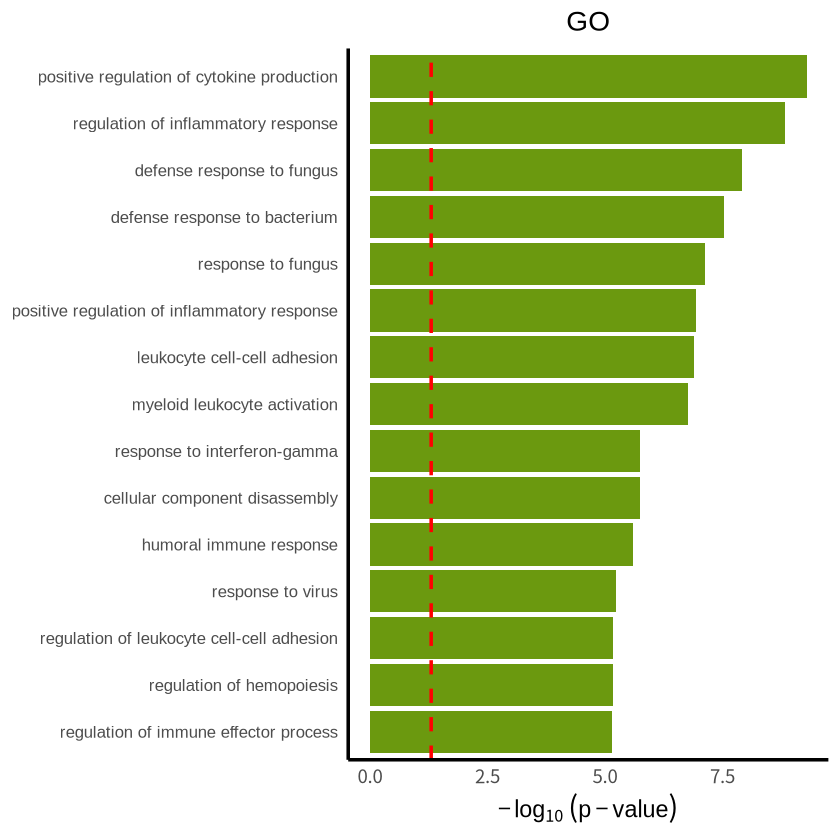

In [3]:
enrich_result_file = './Input/06_GO_enrichment_results.csv' 
top_n = 15
pvalue_threshold = 0.05 
color = '#6B990F' 
title = 'GO' 
output_path = './Output/07_GO_enrichment_plot.pdf'
plot_enrichment_reslut(enrich_result_file, top_n, pvalue_threshold, color, title, output_path)